<div class="alert alert-block alert-info"><font size="6"><b>Sprint 7 Task 1 (S07_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Grab a sports theme dataset you like and select an attribute. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.</SPAN>

In order to solve this practice we start by importing all required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

The data I chose for this practice comes for a Kaggle dataset with statistical info about ATP (Association of Professional Tennis) matches during year 2018. This dataset is the same one I used for Sprint 6 were I already did some imputation, NaN's treatment, features engineering and saved a copy for further use.  

For the matches dataset we have the following column reference:
* ace = absolute number of aces  
* df = number of double faults  
* svpt = total serve points  
* 1stin = 1st serve in  
* 1stwon = points won on 1st serve  
* 2ndwon = points won on 2nd serve  
* SvGms = serve games  
* bpSaved = break point saved  
* bpFaced = break point faced  
* aces = w_ace/minutes

source: https://www.kaggle.com/datasets/pablodroca/atp-tennis-matches-20002019?select=atp_matches_2019.csv

In [2]:
atp_2018 = pd.read_csv('atp_2018.csv') # Tennis matches 2018
pd.set_option('display.max_columns', 50)
atp_2018.sample(5)

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,aces
1675,2018-7650,Antalya,20180625,Grass,"Dzumhur, Damir",BIH,"Vesely, Jiri",CZE,6-3 7-6(1),3,SF,80.0,5.0,1.0,69.0,44.0,30.0,16.0,11.0,6.0,8.0,5.0,2.0,59.0,41.0,28.0,5.0,10.0,3.0,6.0,30.0,1460.0,103.0,550.0,4.0
941,2018-7290,Estoril,20180430,Clay,"Sousa, Joao",POR,"Tiafoe, Francis",USA,6-4 6-4,3,F,79.0,4.0,0.0,57.0,34.0,26.0,12.0,10.0,4.0,6.0,3.0,5.0,55.0,34.0,25.0,9.0,10.0,6.0,10.0,68.0,805.0,64.0,823.0,3.0
2069,2018-580,Australian Open,20180115,Hard,"Fognini, Fabio",ITA,"Benneteau, Julien",FRA,3-6 6-2 6-1 4-6 6-3,5,R32,180.0,3.0,6.0,142.0,92.0,65.0,24.0,21.0,11.0,14.0,10.0,6.0,126.0,83.0,53.0,20.0,22.0,5.0,12.0,25.0,1715.0,59.0,855.0,1.0
2715,2018-M010,S-Hertogenbosch,20180611,Grass,"Tomic, Bernard",AUS,"King, Kevin",USA,6-4 6-2,3,R32,72.0,4.0,0.0,57.0,39.0,29.0,9.0,9.0,7.0,8.0,6.0,5.0,63.0,36.0,27.0,7.0,9.0,7.0,11.0,181.0,316.0,165.0,340.0,3.0
2661,2018-7581,Chengdu,20180924,Hard,"Auger Aliassime, Felix",CAN,"Wu, Yibing",CHN,6-3 6-7(2) 6-1,3,R32,144.0,5.0,4.0,109.0,73.0,52.0,20.0,15.0,5.0,6.0,9.0,3.0,83.0,51.0,34.0,18.0,13.0,7.0,11.0,147.0,402.0,423.0,91.0,2.0


Let's create a new column with minutes played per game. By adding columns **w_SvGms** (games that were served by the winner of the match) and **l_SvGms** (games that were served by the loser of the match) we obtain the total number of games played during the match. If we divide the minutes that lasted the match by toal number of games played we get minutes/game (**min_game**).

In [3]:
atp_2018['min_game'] = atp_2018['minutes'] / (atp_2018['w_SvGms'] + atp_2018['l_SvGms'])

In [4]:
atp_2018['min_game'].describe()

count    2863.000000
mean        4.314699
std         0.677544
min         2.583333
25%         3.898718
50%         4.275862
75%         4.681818
max        20.941176
Name: min_game, dtype: float64

We get a mean of 4,3 minutes per game. Max value is 20,9, probably an outlier. Let's check distribution of our new feature with a histogram: 

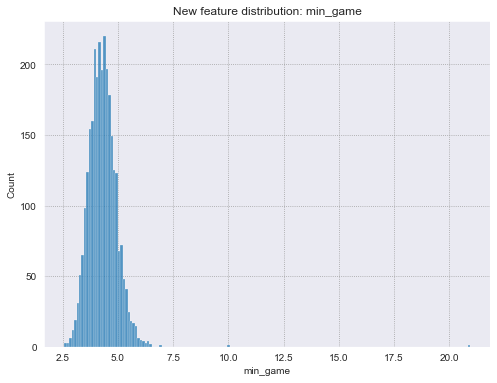

In [5]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = atp_2018, x = 'min_game')
plt.title('New feature distribution: min_game')
plt.show()

Looks like a gaussian distribution, we will make sure shortly but first what about outliers?

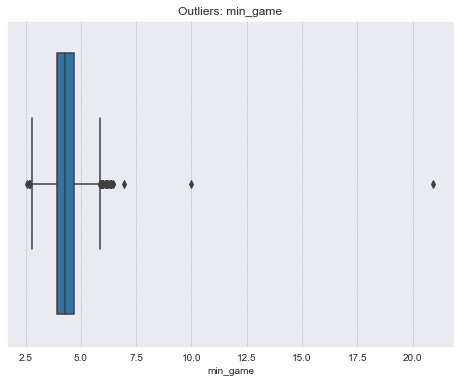

In [6]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = atp_2018['min_game'])
plt.title('Outliers: min_game')
plt.show()

There are not many outliers but let's zoom on values two time bigger than the feature mean:

In [7]:
atp_2018[atp_2018['min_game'] > 9]

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,aces,min_game
593,2018-M-DC-2018-G1-AO-M-PAK-UZB-01,Davis Cup G1 R2: PAK vs UZB,20180406,Grass,"Istomin, Denis",UZB,"Qureshi, Aisam Ul Haq",PAK,7-6(17) 4-1 RET,3,RR,356.0,3.0,1.0,69.0,42.0,35.0,19.0,9.0,2.0,2.0,7.0,6.0,57.0,35.0,31.0,12.0,8.0,0.0,1.0,83.0,673.0,NaN,NaN,1.0,20.941176
1826,2018-6967,Shenzhen,20180924,Hard,"Shapovalov, Denis",CAN,"Ivashka, Ilya",BLR,7-5 2-6 6-3,3,R32,289.0,8.0,3.0,91.0,50.0,38.0,20.0,15.0,2.0,5.0,4.0,5.0,93.0,49.0,35.0,22.0,14.0,4.0,7.0,31.0,1295.0,101.0,588.0,2.0,9.965517


We are going to get rid of the first row (number 593) as it was a match in which one of the players retired before finishing. We are keeping row 1826.

In [8]:
atp_2018.drop(atp_2018[atp_2018['min_game'] > 10].index, inplace = True)

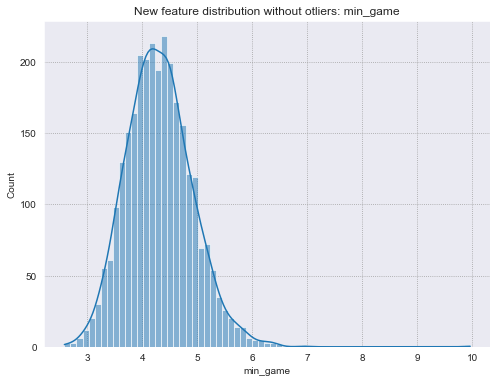

In [9]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = atp_2018, x = 'min_game', kde = 'True')
plt.title('New feature distribution without otliers: min_game')
plt.show()

In [10]:
atp_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 0 to 2862
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2862 non-null   object 
 1   tourney_name        2862 non-null   object 
 2   tourney_date        2862 non-null   int64  
 3   surface             2862 non-null   object 
 4   winner              2862 non-null   object 
 5   country_winner      2862 non-null   object 
 6   loser               2862 non-null   object 
 7   country_loser       2862 non-null   object 
 8   score               2862 non-null   object 
 9   best_of             2862 non-null   int64  
 10  round               2862 non-null   object 
 11  minutes             2862 non-null   float64
 12  w_ace               2862 non-null   float64
 13  w_df                2862 non-null   float64
 14  w_svpt              2862 non-null   float64
 15  w_1stIn             2862 non-null   float64
 16  w_1stW

<u>**p-value:**</u> In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct.

Let's star by testing if the new column we created, **minutes per game (min_game)**, has a normal distribution. This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

So null hypothesis (H0) and alternative hypothesis (H1) wolud be:

H0 = **min_game** attribute follows a Normal/Gaussian distribution.  
H1 = **min_game** attriubute does not follow Normal/Gaussian distribution.

If the P-value is greater than alpha, do not reject the null. I'm taking a sample with 351 observations and then contrast its mean with population mean:

In [11]:
x = atp_2018['min_game'].sample(351, random_state = 7) # same sample size we used in Sampling Sprint
k2, p = stats.normaltest(x)
alpha = 0.005
print(f'P-value = {round(p,3)}')
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

P-value = 0.178
The null hypothesis cannot be rejected


If the null hypotesis cannot be rejected we could say that **min_game** follows a gaussian distribution. Now let' try the following hypothesis:

H0 = mean of **min_game**  is equal to mean of the sample --> H0 = µm = sample mean  
H1 = mean of **min_game**  is different to mean of the sample --> H1 = µm $\neq$ sample mean

In [12]:
x.mean() # sample mean (351 observations)

4.281192401684959

In [13]:
atp_2018['min_game'].mean() # population mean

4.308890026003227

In [14]:
result = stats.ttest_1samp(x, popmean = atp_2018['min_game'].mean(), alternative='two-sided')
print(f'The P-value is {round(result[1],3)}')

if result[1] < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The P-value is 0.363
The null hypothesis cannot be rejected


If the null hypotesis cannot be rejected we could say that **min_game** sample mean is equal to the population mean.

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Continuing with the sports theme dataset you like and select two other attributes, calculate the p-values and say if they reject the null hypothesis by taking a 5% alpha.</SPAN>

For this practice we are going to study if the attributes **min_game** and winner **aces**, if there is a correlation between these two variables. 

As we saw in <SPAN style=color:#1F618D>Practice 1</SPAN>, **min_game** attribute follows a Normal/Gaussian distribution or at least the hypothesis cannot be rejected with a 5% significance.  

Let's see what about **aces** attribute:

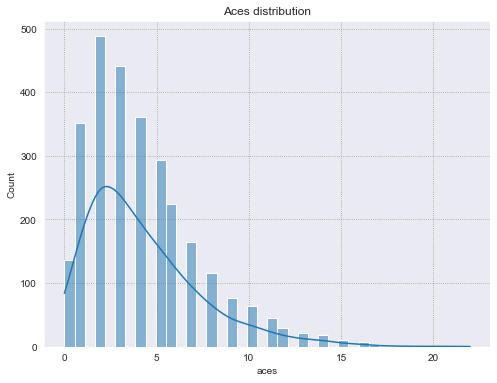

In [15]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = atp_2018, x = 'aces', kde = 'True')
plt.title('Aces distribution')
plt.show()

In [16]:
atp_2018.aces.describe()

count    2862.000000
mean        4.260307
std         3.168962
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        22.000000
Name: aces, dtype: float64

Quite skewed to the right. This was expected as the mean is near 0 and you cannot do less than 0 aces but there are several matches with 10 or more aces when the mean is 4,2. We will check although:

So null hypothesis (H0) and alternative hypothesis (H1) wolud be:

H0 = **aces** attribute follows a Normal/Gaussian distribution.  
H1 = **aces** attriubute does not follow Normal/Gaussian distribution.

If the P-value is greater than alpha, do not reject the null.

In [17]:
x = atp_2018['aces'].sample(351, random_state = 7) # same sample size we used in Sampling Sprint
k2, p = stats.normaltest(x)
alpha = 0.005
print(f'P-value = {p}')
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

P-value = 3.0871399761477104e-23
The null hypothesis can be rejected


In this case we cannot say that the number of aces in 2018 matches follow a gussian distribution. Let's check how these two variables relates to each other:

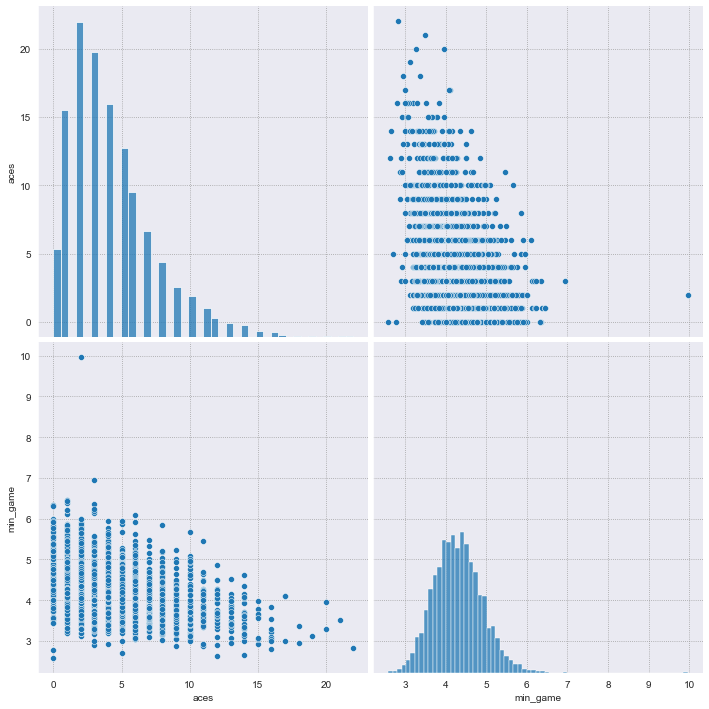

In [18]:
sns.pairplot(atp_2018, vars={'min_game', 'aces'}, height = 5)
plt.show()

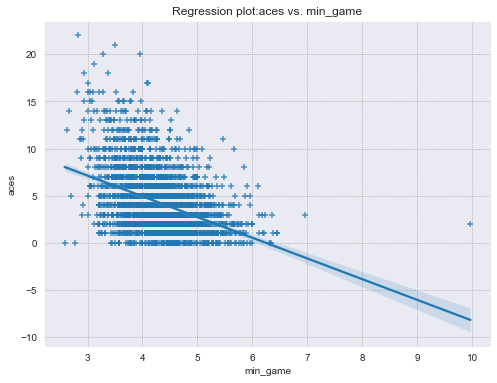

In [19]:
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = 'min_game', y = 'aces', data = atp_2018, marker="+")
plt.title('Regression plot:aces vs. min_game')
plt.show()

In this case, as one of the attributes follows a gaussian distribution and the other one it does't, we use use nonparametric statistical methods like Spearman Rank Correlation.

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

The p-value for a hypothesis test, whose null hypotheisis is that two sets of data are uncorrelated.

H0 = **min_game** and **aces** attributes are uncorrelated.  
H1 = **min_game** and **aces** attributes are correlated.

But first I wolud like to calculate Pearson and Spearman Correlation to see what we get:

In [20]:
corr_1serve = atp_2018['min_game'].corr(method='pearson', other = atp_2018['aces'])
print(f'Pearson Correlation is = {corr_1serve}')

Pearson Correlation is = -0.4175175191229251


In [21]:
corr_1serve2 = atp_2018['min_game'].corr(method='spearman', other = atp_2018['aces'])
print(f'Spearman Correlation is = {corr_1serve2}')

Spearman Correlation is = -0.40492176724559115


Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In this case we have a soft decresing monotonically correlation between these two variables.

Now let's do the test:

In [22]:
from scipy.stats import spearmanr

In [23]:
# Spearman Rank Correlation
x1 = atp_2018['min_game']
x2 = atp_2018['aces']
corr, p_value = spearmanr(x1, x2)
print(f'Spearman Correlation = {corr}, P_value = {p_value}')    
if p_value > 0.05:
    print(f'Variables are uncorrelated (fail to reject H0)')
else:
    print(f'Variables are correlated (reject H0)')

Spearman Correlation = -0.40492176724559115, P_value = 2.233840063986239e-113
Variables are correlated (reject H0)


We got a **p-value smaller than alpha**, this mean we reject the null hypothesis and there would be correlation between the number of aces and the lenght of the match.

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Continue with the sports theme dataset you like and select three attributes. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.</SPAN>

We are going to add another attribute to the equation: **surface** of the match. For example we are going to study the **number of aces ond hard surface for games that were shorter than 5 minutes**. Then we are going to take a sample of this data and contrast the mean of the sample with the mean of the population:

In [24]:
var3_pop = atp_2018[atp_2018['min_game'] < 5].groupby('surface').get_group('Hard')

In [25]:
clean_var3 = var3_pop[['min_game', 'aces', 'surface']]
pop_mean = clean_var3.aces.mean() # population mean
pop_mean

4.866391184573002

In [26]:
aces_sample = clean_var3['aces'].sample(351, random_state = 7)
samp_mean = aces_sample.mean() # sample mean
samp_mean

4.925925925925926

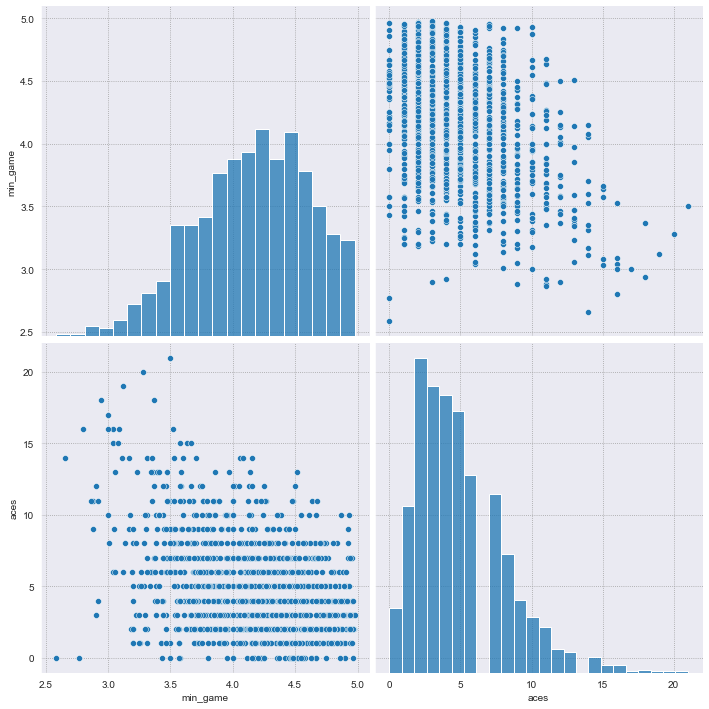

In [27]:
sns.pairplot(clean_var3, height = 5)
plt.show()

Let's start by checking if **aces_sample** attribute follows a Normal distribution.
So null hypothesis (H0) and alternative hypothesis (H1) wolud be:

H0 = **aces_sample** attribute follows a Normal/Gaussian distribution.  
H1 = **aces_sample** attriubute does not follow Normal/Gaussian distribution.

If the P-value is greater than alpha, do not reject the null.

In [28]:
aces_sample # same sample size we used in Sampling Sprint
k2, p = stats.normaltest(aces_sample)
alpha = 0.005
print(f'P-value = {p}')
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

P-value = 5.996419165469664e-10
The null hypothesis can be rejected


There is no gaussian distribution for this sample as we reject the null hypothesis.

The **one-sample Wilcoxon signed rank test** is a non-parametric alternative to one-sample t-test when the data cannot be assumed to be normally distributed. It's used to determine whether the median of the sample is equal to a known standard value.

Now let' try the following hypothesis:

H0 = mean of **aces** for games shorter than 5 minutes on hard surface is equal to mean of the sample --> H0 = µm = sample mean  
H1 = mean of **aces**  for games shorter than 5 minutes on hard surface is different to mean of the sample --> H1 = µm $\neq$ sample mean

In [29]:
from scipy.stats import wilcoxon

In [30]:
rank,pVal = wilcoxon(aces_sample - pop_mean, alternative='two-sided')
print(f'P-value is {pVal}')

if pVal < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

P-value is 0.8012973958224773
The null hypothesis cannot be rejected


Finally, we cannot reject the null hypothesis, so we could say that the sample mean is equal to the population mean with 95% certainty.